In [1]:
from jack_the_dog.state_index_wrapper import StateIndexWrapper
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

import matplotlib.pyplot as plt
from jack_the_dog import NoWalkEnv, ACTION

pygame 2.6.0 (SDL 2.28.4, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


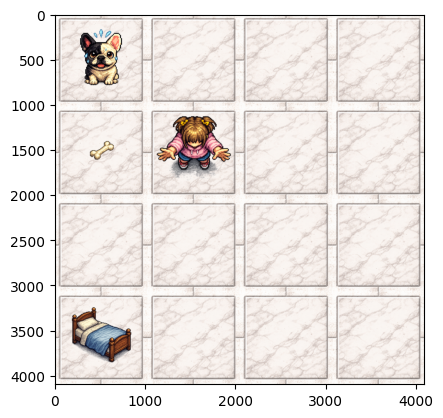

In [ ]:

env = NoWalkEnv(
    seed=SEED,
    more_danger=True,
    dog_start=(0, 0),      # координаты собаки (Jack)
    zoya_start=(1, 1),     # координаты Зои
    safety_start=(3, 0),   # координаты кровати (safety)
    snack_start=(1, 0),    # координаты косточки (snack)
)


env = StateIndexWrapper(env)
observation, info = env.reset()
total_reward = 0
step = 0

terminated = False
truncated = False

img = env.render()
plt.imshow(img)
plt.show()



In [3]:

def show_progress(rewards_batch, log):
    """Функция отображения прогресса обучения."""
    mean_reward = np.mean(rewards_batch)
    log.append(mean_reward)

    clear_output(True)
    plt.figure(figsize=[8, 4])
    plt.subplot(1, 2, 1)
    plt.plot(log, label='Mean rewards')
    plt.legend(loc=4)
    plt.show()

### DQN

Правило обновление:

$$
Q(s,a) \leftarrow Q(s,a) + \alpha \Big[r + \gamma \max_{a'} Q(s',a') - Q(s,a)\Big]
$$


In [ ]:
# Task - 1
# write a code for Q-table initialization
# size of Q-table is n_observation_space x n_action_space
# initialize Q-table with zeros
# fill diagonal with 1/n_action_space

def initialize_q_table(n_observation_space, n_action_space):
    # Q = [state][action]
    """<codehere>"""

    """</codehere>"""
    return Q

In [5]:
n_observation_space = len(env.get_all_states())
n_action_space = len(env.get_possible_actions(env.get_all_states()[0]))
q_table = initialize_q_table(n_observation_space, n_action_space)


print(q_table.shape)


(32, 4)


/Users/zoya/miniconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_all_states to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_all_states` for environment variables or `env.get_wrapper_attr('get_all_states')` that will search the reminding wrappers.
  logger.warn(
/Users/zoya/miniconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_possible_actions to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_possible_actions` for environment variables or `env.get_wrapper_attr('get_possible_actions')` that will search the reminding wrappers.
  logger.warn(


In [ ]:
def select_action_eps_greedy(Q, state, epsilon):
    # выбираем действие, используя eps-greedy исследование среды:
    # 1) с вероятностью epsilon выбираем случайное действие,
    # 2) иначе выбираем действие жадно
    # action = 
   # print("Q-shape", Q.shape)
    """<codehere>"""
  
    """</codehere>"""
    return action

In [ ]:
def update_Q_learning(Q, s, a, r, next_s, alpha, gamma, epsilon):
    # alpha: learning rate, gamma: discount factor
    # вычисли V(next_s) - estimate of optimal future value
    # V_ns = 
    """<codehere>"""

    """</codehere>"""

    # посчитай TD ошибку
    # td_error = 
    """<codehere>"""
    #print("s=",s)
   # print("a=",a)

    """</codehere>"""

    # обновление Q-функции
    Q[s, a] += alpha * td_error
    
def update_Q_sarsa(Q, s, a, r, next_s, alpha, gamma, epsilon):
    # alpha: learning rate, gamma: discount factor
    # вычисли V(next_s) - estimate value of next state
    # V_ns = 
    """<codehere>"""

    """</codehere>"""

    # посчитай TD ошибку
    # td_error = 
    """<codehere>"""
    #print("s=",s)
   # print("a=",a)

    """</codehere>"""

    # обновление Q-функции
    Q[s, a] += alpha * td_error

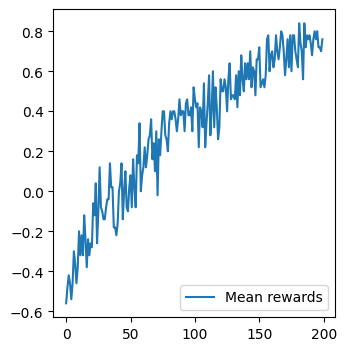

Episode: 20000, Reward: 1.0, Eps: 0.0947331034349224


In [ ]:

# определяем память, в которой будет храниться Q(s,a)
Q = initialize_q_table(n_observation_space, n_action_space)
log = []
rewards_batch = []

# гиперпараметры алгоритма
alpha = 0.1
gamma = 0.99
epsilon = 0.7
epsilon_decay = 0.99
n_episodes = 20000

for i_episode in range(1, n_episodes + 1):
  #  print(i_episode)
    s, _ = env.reset(seed=42)

    r, episode_reward = 0, 0
    done = False

    while not done:
        
        # select action eps-greedy
        # a = ...
        """<codehere>"""

        """</codehere>"""
       # print("a=",a)
        # выполняем действие в среде 
        next_s, r, terminated, truncated, _ = env.step(a)
     #   print(r)
        done = terminated or truncated
        # Update Q-function
        """<codehere>"""

       # print(s)
        """</codehere>"""

        s = next_s
        episode_reward += r
   # print("episode_reward=",episode_reward)
    rewards_batch.append(episode_reward)
    if i_episode % 100 == 0:
        show_progress(rewards_batch, log)
        rewards_batch = []
        print(
            f"Episode: {i_episode}, Reward: {episode_reward}"
            f", Eps: {epsilon}"
        )
        epsilon *= epsilon_decay
        
    

In [22]:
s, _ = env.reset(seed=42)
done = False
while not done:
    a = select_action_eps_greedy(Q, s, epsilon=0.01)
    next_s, r, terminated, truncated, _ = env.step(a)
    done = terminated or truncated
    s = next_s
    img = env.render()
    plt.imshow(img)
    plt.show()
    clear_output(True)
    
if r >= 1:
    print("Good job, Jack!")
else:
    print("Try again!")




Good job, Jack!


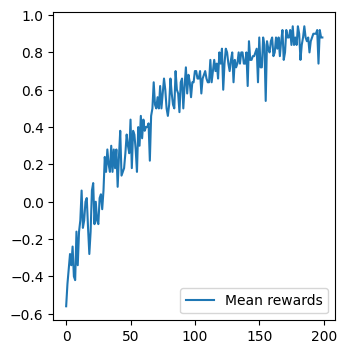

Episode: 20000, Reward: 1.0, Eps: 0.0947331034349224


In [23]:

# определяем память, в которой будет храниться Q(s,a)
Q = initialize_q_table(n_observation_space, n_action_space)
log = []
rewards_batch = []

# гиперпараметры алгоритма
alpha = 0.1
gamma = 0.99
epsilon = 0.7
epsilon_decay = 0.99
n_episodes = 20000

for i_episode in range(1, n_episodes + 1):
  #  print(i_episode)
    s, _ = env.reset(seed=42)

    r, episode_reward = 0, 0
    done = False

    while not done:
        
        # select action eps-greedy
        # a = ...
        """<codehere>"""
        a = select_action_eps_greedy(Q, s, epsilon)
        """</codehere>"""
       # print("a=",a)
        # выполняем действие в среде 
        next_s, r, terminated, truncated, _ = env.step(a)
     #   print(r)
        done = terminated or truncated
        # Update Q-function
        """<codehere>"""
        update_Q_sarsa(Q, s, a, r, next_s, alpha, gamma, epsilon)
       # print(s)
        """</codehere>"""

        s = next_s
        episode_reward += r
   # print("episode_reward=",episode_reward)
    rewards_batch.append(episode_reward)
    if i_episode % 100 == 0:
        show_progress(rewards_batch, log)
        rewards_batch = []
        print(
            f"Episode: {i_episode}, Reward: {episode_reward}"
            f", Eps: {epsilon}"
        )
        epsilon *= epsilon_decay
        
    

In [24]:
s, _ = env.reset(seed=42)
done = False
while not done:
    a = select_action_eps_greedy(Q, s, epsilon=0.01)
    next_s, r, terminated, truncated, _ = env.step(a)
    done = terminated or truncated
    s = next_s
    img = env.render()
    plt.imshow(img)
    plt.show()
    clear_output(True)
    
if r >= 1:
    print("Good job, Jack!")
else:
    print("Try again!")




Good job, Jack!


### Сравните поведение Джека обученного с помощью DQN и SARSA. Почему стратегии отличаются между собой?